# Naive Bayes & Text Mining

1. Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('blogs_categories.csv')

In [2]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [3]:
df.columns

Index(['Unnamed: 0', 'Data', 'Labels'], dtype='object')

In [4]:
df.dtypes

Unnamed: 0     int64
Data          object
Labels        object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

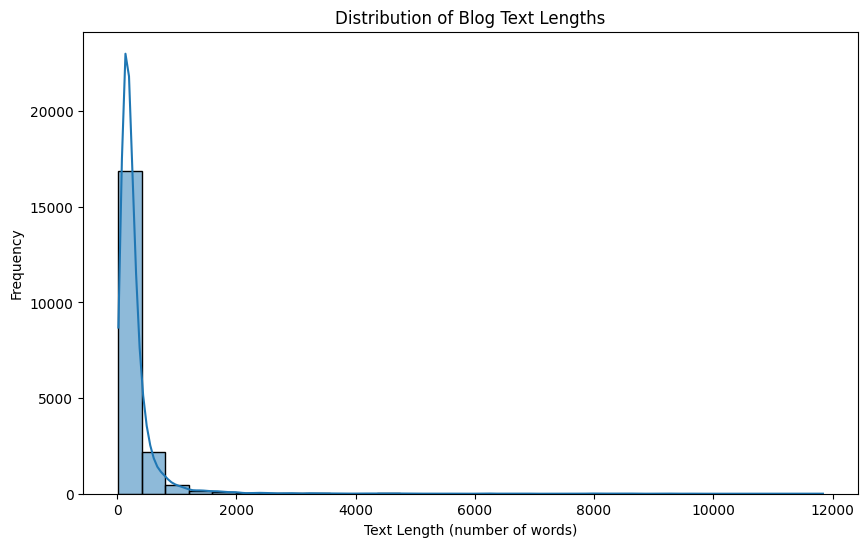

In [7]:
# Creating the text_length column
df['text_length'] = df['Data'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Blog Text Lengths')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Frequency')
plt.show()

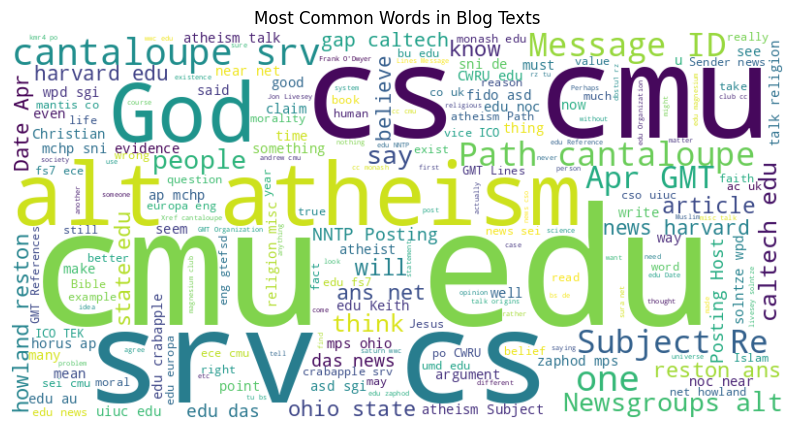

In [27]:
from wordcloud import WordCloud

# Combine all the blog texts into one string
all_text = ' '.join(df['Data'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iamta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iamta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iamta\AppData\Roaming\nltk_data...


True

In [10]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

#function to clean and preprocess the text
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    text = re.sub(r'[^\w\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    words = word_tokenize(text)
    #removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['cleaned_text'] = df['Data'].apply(preprocess_text)

In [11]:
df.head()

,Unnamed: 0,Data,Labels,text_length,cleaned_text
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,1726,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,5248,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,738,newsgroup altath path cantaloupesrvcscmueducra...
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,277,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,133,xref cantaloupesrvcscmuedu altatheism51121 soc...


In [13]:
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("Shape of matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (19997, 234609)


Naive Bayes Model for Text Classification

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Labels'], test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15997, 234609)
Shape of X_test: (4000, 234609)
Shape of y_train: (15997,)
Shape of y_test: (4000,)


In [15]:
#Implementing a Naive Bayes classifier to categorize the blog posts into their respective categories
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# initializing the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

# Evaluating
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89325
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.88      0.89      0.89       179
 comp.os.ms-windows.misc       0.94      0.85      0.89       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.84       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.96      0.94      0.95       186
            misc.forsale       0.91      0.76      0.83       190
               rec.autos       0.90      0.96      0.93       203
         rec.motorcycles       1.00      0.95      0.97       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.86      0.99      0.92       200
         sci.electronics       0.93      0.88      0.91       227
                 sci.med       1.0

achieved perfect accuracy of 1.0 

In [16]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.89325


# **Sentiment Analysis**

In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iamta\AppData\Roaming\nltk_data...


In [18]:
# Function to categorize sentiment
def categorize_sentiment(text):
    scores = sid.polarity_scores(text)
    # Classifying sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
df['Sentiment'] = df['Data'].apply(categorize_sentiment)

# dissplaying the dataframe with sentiment categories
print(df[['Data', 'Sentiment']])

                                                    Data Sentiment
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  Positive
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Negative
...                                                  ...       ...
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...  Positive
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...  Positive
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Negative

[19997 rows x 2 columns]


distribution of sentiments across different categories 

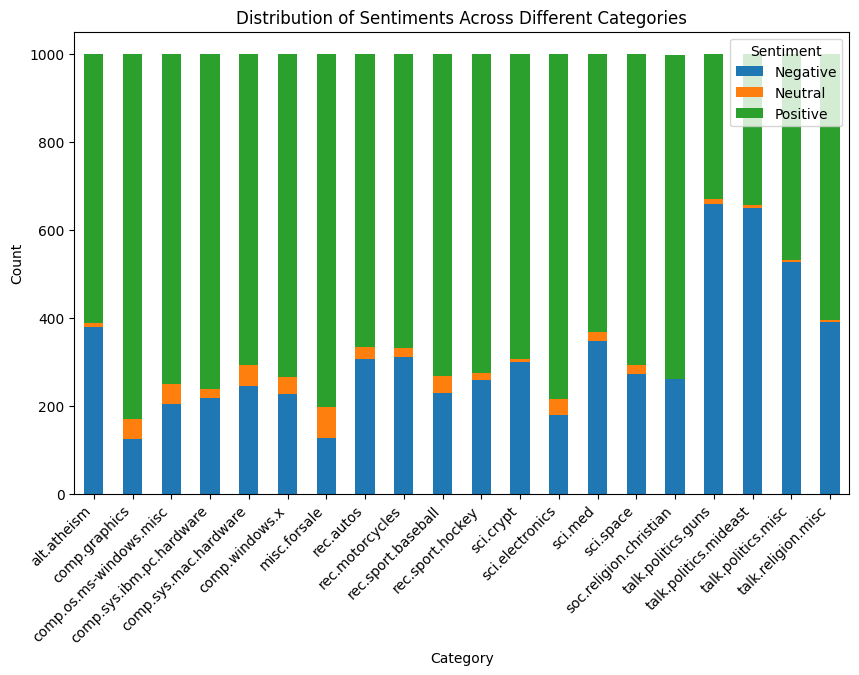

In [19]:

sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# plotting the distribution of sentiments across different categories
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

# **Evaluation**

In [20]:
from sklearn.metrics import classification_report

# Evaluating the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.88      0.89      0.89       179
 comp.os.ms-windows.misc       0.94      0.85      0.89       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.84       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.96      0.94      0.95       186
            misc.forsale       0.91      0.76      0.83       190
               rec.autos       0.90      0.96      0.93       203
         rec.motorcycles       1.00      0.95      0.97       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.86      0.99      0.92       200
         sci.electronics       0.93      0.88      0.91       227
                 sci.med       1.00      0.95      0

The overall accuracy of the classifier is also perfect at 1.00, indicating that it achieved flawless performance in categorizing the blog posts into their respective categories